# Solving the RC-Lowpass using Fourier-Transforms and the full differential Equation.

## Circuit

For the RC-Lowpass we have a Resistor $R$ in series with a Capacitor $C$. The input Voltage $x(t)$ is across both $R$ and $C$, the output voltage $y(t)$ is the voltage across the capacitor. 
In order to establish the differential equation for the system we need to specify the relations between voltages over the components and currents through the components. 
1. Resistor
$v_R (t) = R \cdot i(t)$
2. Capacitor
$i(t) = C \frac{d}{dt}v_c (t)$
3. and
x(t) = v_c (t) + v_r (t)
$y(t) = v_C (t)$

Elimination of $i(t)$ yields the Differential Equation: 
$x(t) = RC \frac{d y(t)}{dt}+ y(t)$

Now we will solve this using the fourier transform, and especially the differentiation rule for the fourier transform (where FT means fourier transform and IFT means inverse fourier transform): 

If $x(t) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} \! X(j \omega) \mathrm{e}^{\ j \omega t} \, \mathrm{d}\omega$

when we differentiate with respect to t we get: 

$\frac{d x(t)}{dt}= \frac{d}{dt}\frac{1}{2 \pi} \int_{-\infty}^{\infty} \! X(j \omega) \mathrm{e}^{\ j \omega t} \, \mathrm{d}\omega$

$\frac{d x(t)}{dt}= \frac{d}{dt}\frac{1}{2 \pi} \int_{-\infty}^{\infty} \! X(j \omega) \frac{d}{dt} \mathrm{e}^{\ j \omega t} \, \mathrm{d}\omega$

$\frac{d x(t)}{dt}= \frac{d}{dt}\frac{1}{2 \pi} \int_{-\infty}^{\infty} \! \big[ (j \omega) X(j \omega) \mathrm{e}^{\ j \omega t} \big] \, \mathrm{d}\omega = IFT \big[ j \omega X(j\omega) \big]$

And consequently

$FT \big[ \frac{d}{dt} x(t) \big] = j \omega X(j\omega)$. 

This we can now use in our differential equation. 
$x(t) = RC \frac{d y(t)}{dt}+ y(t)$ will now transform to (using FT)

$X(j \omega) = RC j\omega Y(j \omega) + Y(j \omega)$ using the differential rule from above. 

$X(j \omega) = (1+ j\omega RC) Y(j \omega) $

$Y(j \omega) = \frac{1}{1+ j\omega RC} X(j \omega)$

Now we recall that the inverse fourier transform of a fraction with a linear function of $j \omega$ in the denominator has is known. 

$IFT \big[ \frac{1}{a + j\omega} \big] = \mathrm{e}^{-at} \epsilon(t) $ where $\epsilon(t)$ is the step function. 

We reorganize our FT by expanding with $1/RC$ to get

$Y(j \omega) = \frac{1/RC}{1/RC+ j\omega} X(j \omega) = \frac{1}{RC} \frac{1}{1/RC+ j\omega} X(j \omega) $

Now we can identify $a = 1/RC$ and solve the inverse FT: 

$y(t) = \frac{1}{RC} \big[\mathrm{e}^{-\frac{t}{RC}} \epsilon (t) \big] \ast x(t)$

Up to here we have already achieved several things. first, in the frequency domain we can identify the function relating $X(j\omega)$ and $Y(j\omega$ as $H(\omega)$, the transfer function. By doing the IFT as just shown, we now have also calculated the impulse response $h(t)$ as the IFT of $H(\omega)$. Now we actually need to define an input and convolute it with the impulse response to get our output to that input. We do this for the example of a complex exponential input, i.e. a sine/cosine type input function. 

$x(t) = v_0 \mathrm{e}^{\ j\omega_0 t}$

We then have

$y(t) = \frac{1}{RC} \big[\mathrm{e}^{\ -\frac{t}{RC}} \epsilon (t) \big] \ast v_0 \mathrm{e}^{\ j \omega t}$

$y(t) = \frac{v_0}{RC}  \int_{-\infty}^{\infty} \mathrm{e}^{\ -\frac{\tau}{RC}} \epsilon (\tau)  \mathrm{e}^{\ j \omega (t-\tau)} \ \mathrm{d}\tau$

$y(t) = \frac{v_0}{RC}  \mathrm{e}^{\ j \omega t} \int_{-\infty}^{\infty} \mathrm{e}^{\ -\frac{\tau}{RC}} \epsilon (\tau)  \mathrm{e}^{\ j \omega (-\tau)} \ \mathrm{d}\tau$

$y(t) = \frac{v_0}{RC}  \mathrm{e}^{\ j \omega t} \int_{0}^{\infty} \mathrm{e}^{\ -\frac{\tau}{RC}}  \mathrm{e}^{\ j \omega (-\tau)} \ \mathrm{d}\tau$

$y(t) = \frac{v_0}{RC}  \mathrm{e}^{\ j \omega t} \int_{0}^{\infty} \mathrm{e}^{\ - \tau (j \omega + \frac{\tau}{RC})} \ \mathrm{d}\tau$

$y(t) = \frac{v_0}{RC} \frac{1}{-j \omega - 1/RC}  \mathrm{e}^{\ j \omega t} \big[ \mathrm{e}^{\ - \tau (j \omega + \frac{\tau}{RC})} \big]_0^{\infty}$

Here for $\tau = \infty$ the exponential has a limit of zero due to the $-\tau/RC$ part and for $\tau = 0$ the exponential assumes a value of 1, giving  $-1$ due to the fact that we subtract the value at 0 from the rest. So we get overall: +

$y(t) = \frac{v_0}{RC} \frac{1}{-j \omega - 1/RC}  \mathrm{e}^{\ j \omega t} \big[-1 \big]$

$y(t) = \frac{v_0}{RC} \frac{1}{j \omega + 1/RC}  \mathrm{e}^{\ j \omega t} $

$y(t) = v_0 \frac{1}{j \omega RC + 1}  \mathrm{e}^{\ j \omega t} $ q.e.d.

In [44]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import scipy
from scipy.signal import butter, lfilter, freqz

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (16.0,9.0)

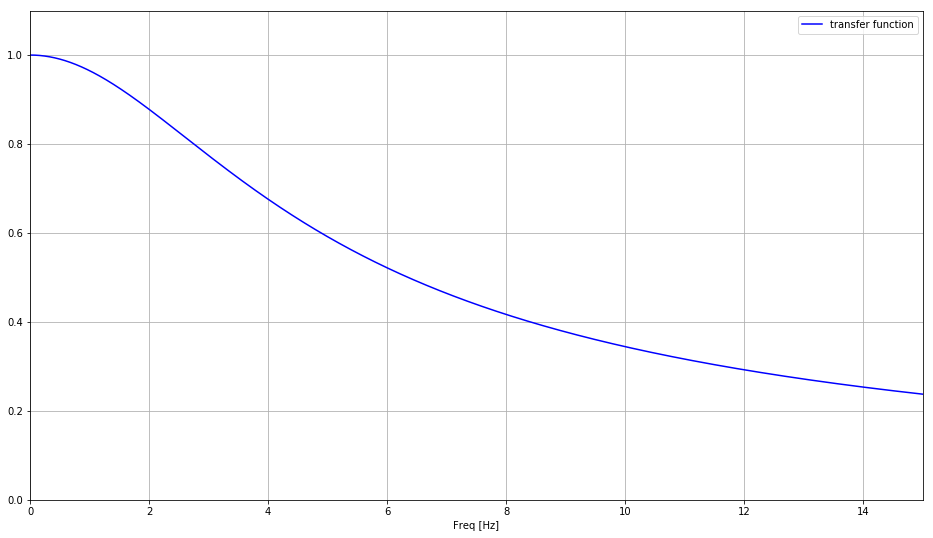

In [73]:
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

Fn = 1000
RC = 1/(2*np.pi*cutoff)

t = np.arange(0, 15, 1/Fn)

x = lambda t: (1/(np.sqrt(1+(t*RC*2*np.pi)**2)).astype(float))

plt.plot(t, x(t), 'b-', label='transfer function')
plt.xlabel('Freq [Hz]')
plt.grid()
plt.legend()
plt.xlim(0, 0.5*fs)
plt.ylim(0, 1.1)
plt.show()

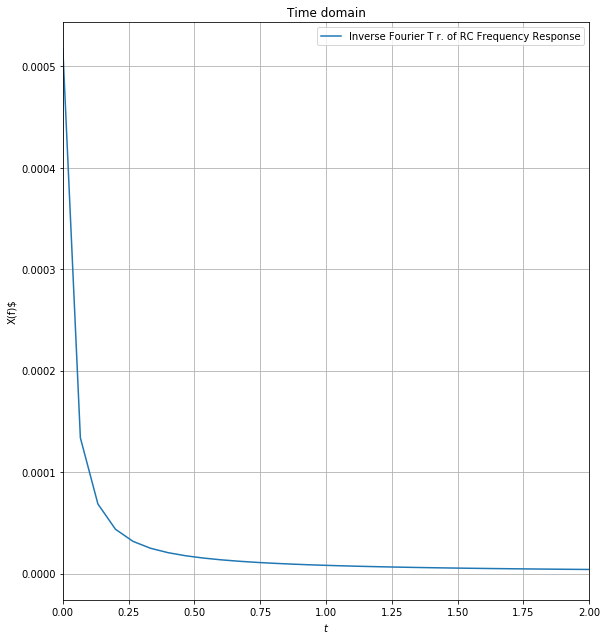

In [71]:
f = np.linspace(0, Fs, len(t), endpoint=False)
X = np.fft.ifft(x(t))/Fs
plt.subplot(122)
plt.plot(f, abs(X), label='Inverse Fourier T r. of RC Frequency Response')
plt.xlim((0, 2))
plt.xlabel('$t$'); plt.ylabel('X(f)$'); plt.grid(True); plt.title('Time domain'); plt.legend(fontsize=10);
    
plt.tight_layout()